# Classification Problem Report

Author: Sandra Marcos Bonet

### Index

* [1 Data](#chapter1)
    * [1.1 Reading the data](#section_1_1)
    * [1.2 EDA](#section_1_2)
    * [1.3 Preparing the data](#section_1_3)
* [2 Classifier Exploration](#chapter2)
    * [2.1 Choosing the right estimator](#section_2_1)
    * [2.2 Classifiers](sSection_2_2)
        * [2.2.1 SVM](#section_2_2_1)
        * [2.2.2 KNN](#section_2_2_2)
        * [2.2.3 Random Forest](#section_2_2_3)
* [3. Model Comparison](#chapter3)
* [4. Conclusions](#chapter4)

<a name='chapter1'></a>
# 1. Data

<a name='section_1_1'></a>
## 1.1. Reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv("dataset_test.csv", sep=";", decimal=",")
# Show all columns
pd.options.display.max_columns = None
df.head()

,avg_words_per_sentence,avg_word_size,n_sentences,ttr,text_length,upper_case,upper_case_ratio,quotes_count,quotes_ratio,entities_ratio,ratio_ADJ,ratio_ADP,ratio_ADV,ratio_DET,ratio_NOUN,ratio_PRON,ratio_PROPN,ratio_PUNCT,ratio_SYM,ratio_VERB,sentiment,id,Type,t_avg_words_per_sentence,t_avg_word_size,t_n_sentences,t_ttr,t_text_length,t_upper_case,t_upper_case_ratio,t_quotes_count,t_quotes_ratio,t_entities_ratio,t_ratio_ADJ,t_ratio_ADP,t_ratio_ADV,t_ratio_DET,t_ratio_NOUN,t_ratio_PRON,t_ratio_PROPN,t_ratio_PUNCT,t_ratio_SYM,t_ratio_VERB,t_sentiment
0,48.100000,4.248986,10,0.869260,2509,169,0.067358,2,0.000797,0.002391,0.009566,0.023914,0.011160,0.026704,0.033081,0.011160,0.010363,0.017138,0.000399,0.018733,-0.174672,1,False,18.0,4.944444,1,0.888889,106,85,0.801887,0,0.000000,0.000000,0.018868,0.037736,0.0,0.018868,0.037736,0.009434,0.028302,0.000000,0.009434,0.009434,0.00
1,29.066667,4.508929,15,0.890855,2363,91,0.038510,2,0.000846,0.007194,0.008887,0.023699,0.005078,0.030893,0.030470,0.009310,0.022006,0.019890,0.005501,0.016504,0.128205,2,True,11.0,5.363636,1,0.818182,69,1,0.014493,0,0.000000,0.014493,0.000000,0.043478,0.0,0.028986,0.057971,0.000000,0.014493,0.000000,0.000000,0.014493,0.00
2,24.277778,4.189070,18,0.888000,2206,52,0.023572,13,0.005893,0.002720,0.011333,0.021759,0.007253,0.026745,0.030372,0.009066,0.014506,0.035358,0.000000,0.019946,0.112360,3,True,10.0,4.500000,1,1.000000,52,5,0.096154,1,0.019231,0.000000,0.000000,0.019231,0.0,0.038462,0.019231,0.000000,0.038462,0.038462,0.000000,0.038462,0.00
3,32.666667,4.225242,9,0.840667,1528,61,0.039921,1,0.000654,0.009162,0.007199,0.034686,0.001963,0.034031,0.035340,0.005890,0.022906,0.019634,0.000000,0.019634,0.176056,4,True,7.0,6.000000,1,1.000000,48,3,0.062500,0,0.000000,0.041667,0.000000,0.020833,0.0,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.041667,0.00
4,45.272727,4.929401,11,0.811680,2878,56,0.019458,6,0.002085,0.009034,0.014593,0.021195,0.006254,0.025365,0.029882,0.007992,0.014246,0.014593,0.000000,0.019458,0.404858,5,False,11.0,5.181818,1,1.000000,67,6,0.089552,0,0.000000,0.029851,0.014925,0.029851,0.0,0.014925,0.014925,0.000000,0.074627,0.000000,0.000000,0.014925,1.25


<a name='section_1_2'></a>
## Exploratory Data Analysis (EDA)

In this section we will explore the data we have.
First, we will have a look at the statistical information about each feature. Later we'll check the size of the dataset, which paramenters and kind of data do we have, etc.
This exploratory data analysis will be useful to understand more the data we will be working with and, if necessary, treat the data in order to prepare it for further steps.


In [3]:
df.describe()

,avg_words_per_sentence,avg_word_size,n_sentences,ttr,text_length,upper_case,upper_case_ratio,quotes_count,quotes_ratio,entities_ratio,ratio_ADJ,ratio_ADP,ratio_ADV,ratio_DET,ratio_NOUN,ratio_PRON,ratio_PROPN,ratio_PUNCT,ratio_SYM,ratio_VERB,sentiment,id,t_avg_words_per_sentence,t_avg_word_size,t_n_sentences,t_ttr,t_text_length,t_upper_case,t_upper_case_ratio,t_quotes_count,t_quotes_ratio,t_entities_ratio,t_ratio_ADJ,t_ratio_ADP,t_ratio_ADV,t_ratio_DET,t_ratio_NOUN,t_ratio_PRON,t_ratio_PROPN,t_ratio_PUNCT,t_ratio_SYM,t_ratio_VERB,t_sentiment
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,38.025655,4.471700,13.058702,0.858110,2354.879506,97.870237,0.041677,3.670443,0.001590,0.008869,0.010790,0.029025,0.006582,0.024084,0.032248,0.009133,0.019974,0.020673,0.000769,0.016825,0.028323,280.624099,12.000172,4.894989,1.018538,0.970578,67.680742,10.436663,0.144050,0.144181,0.001966,0.019677,0.009291,0.031566,0.003712,0.018852,0.030975,0.004337,0.041189,0.011799,0.002426,0.018525,-0.096635
std,17.751023,0.284818,11.557728,0.047932,1722.629215,88.399886,0.020603,4.207081,0.001391,0.004810,0.003188,0.004398,0.003004,0.003863,0.004895,0.003990,0.008919,0.005600,0.001407,0.004465,0.211539,190.861875,3.941849,1.359834,0.142389,0.048256,19.745834,18.871810,0.224764,0.365827,0.005134,0.016341,0.011726,0.014613,0.007734,0.014987,0.017509,0.008171,0.024088,0.016946,0.008962,0.012641,0.639606
min,11.944444,3.492068,1.000000,0.489311,124.000000,5.000000,0.005102,0.000000,0.000000,0.000000,0.000000,0.008475,0.000000,0.009479,0.014205,0.000920,0.000729,0.006173,0.000000,0.004742,-1.279070,1.000000,1.000000,3.100000,1.000000,0.722222,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.500000
25%,28.632997,4.291633,7.000000,0.826936,1354.500000,44.000000,0.027415,1.000000,0.000586,0.005382,0.008763,0.026047,0.004405,0.021646,0.028936,0.006320,0.013604,0.016808,0.000000,0.013649,-0.105542,122.000000,9.000000,4.307692,1.000000,0.937500,54.000000,3.000000,0.041096,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.018519,0.000000,0.024100,0.000000,0.000000,0.011976,-0.555556
50%,35.869565,4.480323,10.000000,0.860806,1896.000000,73.000000,0.037480,2.000000,0.001382,0.008248,0.010650,0.028910,0.006350,0.023973,0.032284,0.008879,0.018478,0.020050,0.000290,0.016600,0.036765,243.000000,12.000000,4.791667,1.000000,1.000000,67.000000,4.000000,0.067797,0.000000,0.000000,0.017391,0.000000,0.030928,0.000000,0.017544,0.029851,0.000000,0.039216,0.000000,0.000000,0.017241,0.000000
75%,43.679487,4.652157,15.000000,0.893743,2816.500000,121.000000,0.051287,5.000000,0.002302,0.011533,0.012567,0.031949,0.008429,0.026691,0.035481,0.011330,0.024601,0.024096,0.001019,0.019724,0.159809,433.500000,14.000000,5.300000,1.000000,1.000000,79.000000,7.000000,0.111111,0.000000,0.000000,0.030303,0.015873,0.041667,0.000000,0.028571,0.042254,0.008511,0.056604,0.020000,0.000000,0.025641,0.000000
max,421.000000,5.470588,104.000000,0.985450,15344.000000,882.000000,0.206358,36.000000,0.008535,0.031120,0.025157,0.045946,0.019462,0.038007,0.047761,0.027864,0.062339,0.044458,0.016376,0.032670,0.714286,676.000000,29.000000,40.000000,3.000000,1.000000,151.000000,103.000000,0.900000,2.000000,0.034483,0.105263,0.095238,0.085714,0.049180,0.083333,0.120000,0.042553,0.128571,0.095238,0.078947,0.100000,2.500000


In [4]:
shape = df.shape
print('There are %s examples with %s features each' % (shape[0], shape[1]))

There are 971 examples with 44 features each


In [5]:
df.columns

Index(['avg_words_per_sentence', 'avg_word_size', 'n_sentences', 'ttr',
       'text_length', 'upper_case', 'upper_case_ratio', 'quotes_count',
       'quotes_ratio', 'entities_ratio', 'ratio_ADJ', 'ratio_ADP', 'ratio_ADV',
       'ratio_DET', 'ratio_NOUN', 'ratio_PRON', 'ratio_PROPN', 'ratio_PUNCT',
       'ratio_SYM', 'ratio_VERB', 'sentiment', 'id', 'Type',
       't_avg_words_per_sentence', 't_avg_word_size', 't_n_sentences', 't_ttr',
       't_text_length', 't_upper_case', 't_upper_case_ratio', 't_quotes_count',
       't_quotes_ratio', 't_entities_ratio', 't_ratio_ADJ', 't_ratio_ADP',
       't_ratio_ADV', 't_ratio_DET', 't_ratio_NOUN', 't_ratio_PRON',
       't_ratio_PROPN', 't_ratio_PUNCT', 't_ratio_SYM', 't_ratio_VERB',
       't_sentiment'],
      dtype='object')

**Check if there are missing values**

In [6]:
df.isnull().values.any()

False

**Check the type of data.**

**Note:** Most of the data was firstly read as object, despite of being numerical. This was due to the decimal separator specificed as comma instead of dot. This has been fixed in the function to read the CSV adding the attribute ```decimal=","```

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 44 columns):
avg_words_per_sentence      971 non-null float64
avg_word_size               971 non-null float64
n_sentences                 971 non-null int64
ttr                         971 non-null float64
text_length                 971 non-null int64
upper_case                  971 non-null int64
upper_case_ratio            971 non-null float64
quotes_count                971 non-null int64
quotes_ratio                971 non-null float64
entities_ratio              971 non-null float64
ratio_ADJ                   971 non-null float64
ratio_ADP                   971 non-null float64
ratio_ADV                   971 non-null float64
ratio_DET                   971 non-null float64
ratio_NOUN                  971 non-null float64
ratio_PRON                  971 non-null float64
ratio_PROPN                 971 non-null float64
ratio_PUNCT                 971 non-null float64
ratio_SYM            

**Let's see if we have a balanced number of Target values.**

In [8]:
df['Type'].value_counts()

True     491
False    480
Name: Type, dtype: int64

In [9]:
df['Type'].value_counts(normalize=True)

True     0.505664
False    0.494336
Name: Type, dtype: float64

<a name='section_1_3'></a>
## 1. 3. Preparing the data

Resources:
* [https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/](https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/)
* [https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization)
* [https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)

### Split dataset and data normalization


**Let's separate the input data and the expected data from the dataset and transform it to numeric variables.**

* Type values are boolean, let's transform them to int variables: True=1, False=0

Then, split data into:

* X: features
* y: target (_True_ or _False_ categories)

In [10]:
y = df['Type'].astype(int).to_numpy()
y

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,

The features (X) are the rest of the data.  (the dataset without the Type classes). Let's check that we have split the dataset correctly.

In [11]:
features = df.drop(columns=['Type'])
features.columns

Index(['avg_words_per_sentence', 'avg_word_size', 'n_sentences', 'ttr',
       'text_length', 'upper_case', 'upper_case_ratio', 'quotes_count',
       'quotes_ratio', 'entities_ratio', 'ratio_ADJ', 'ratio_ADP', 'ratio_ADV',
       'ratio_DET', 'ratio_NOUN', 'ratio_PRON', 'ratio_PROPN', 'ratio_PUNCT',
       'ratio_SYM', 'ratio_VERB', 'sentiment', 'id',
       't_avg_words_per_sentence', 't_avg_word_size', 't_n_sentences', 't_ttr',
       't_text_length', 't_upper_case', 't_upper_case_ratio', 't_quotes_count',
       't_quotes_ratio', 't_entities_ratio', 't_ratio_ADJ', 't_ratio_ADP',
       't_ratio_ADV', 't_ratio_DET', 't_ratio_NOUN', 't_ratio_PRON',
       't_ratio_PROPN', 't_ratio_PUNCT', 't_ratio_SYM', 't_ratio_VERB',
       't_sentiment'],
      dtype='object')

In [12]:
features.shape

(971, 43)

In [13]:
features.describe()

,avg_words_per_sentence,avg_word_size,n_sentences,ttr,text_length,upper_case,upper_case_ratio,quotes_count,quotes_ratio,entities_ratio,ratio_ADJ,ratio_ADP,ratio_ADV,ratio_DET,ratio_NOUN,ratio_PRON,ratio_PROPN,ratio_PUNCT,ratio_SYM,ratio_VERB,sentiment,id,t_avg_words_per_sentence,t_avg_word_size,t_n_sentences,t_ttr,t_text_length,t_upper_case,t_upper_case_ratio,t_quotes_count,t_quotes_ratio,t_entities_ratio,t_ratio_ADJ,t_ratio_ADP,t_ratio_ADV,t_ratio_DET,t_ratio_NOUN,t_ratio_PRON,t_ratio_PROPN,t_ratio_PUNCT,t_ratio_SYM,t_ratio_VERB,t_sentiment
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,38.025655,4.471700,13.058702,0.858110,2354.879506,97.870237,0.041677,3.670443,0.001590,0.008869,0.010790,0.029025,0.006582,0.024084,0.032248,0.009133,0.019974,0.020673,0.000769,0.016825,0.028323,280.624099,12.000172,4.894989,1.018538,0.970578,67.680742,10.436663,0.144050,0.144181,0.001966,0.019677,0.009291,0.031566,0.003712,0.018852,0.030975,0.004337,0.041189,0.011799,0.002426,0.018525,-0.096635
std,17.751023,0.284818,11.557728,0.047932,1722.629215,88.399886,0.020603,4.207081,0.001391,0.004810,0.003188,0.004398,0.003004,0.003863,0.004895,0.003990,0.008919,0.005600,0.001407,0.004465,0.211539,190.861875,3.941849,1.359834,0.142389,0.048256,19.745834,18.871810,0.224764,0.365827,0.005134,0.016341,0.011726,0.014613,0.007734,0.014987,0.017509,0.008171,0.024088,0.016946,0.008962,0.012641,0.639606
min,11.944444,3.492068,1.000000,0.489311,124.000000,5.000000,0.005102,0.000000,0.000000,0.000000,0.000000,0.008475,0.000000,0.009479,0.014205,0.000920,0.000729,0.006173,0.000000,0.004742,-1.279070,1.000000,1.000000,3.100000,1.000000,0.722222,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.500000
25%,28.632997,4.291633,7.000000,0.826936,1354.500000,44.000000,0.027415,1.000000,0.000586,0.005382,0.008763,0.026047,0.004405,0.021646,0.028936,0.006320,0.013604,0.016808,0.000000,0.013649,-0.105542,122.000000,9.000000,4.307692,1.000000,0.937500,54.000000,3.000000,0.041096,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.018519,0.000000,0.024100,0.000000,0.000000,0.011976,-0.555556
50%,35.869565,4.480323,10.000000,0.860806,1896.000000,73.000000,0.037480,2.000000,0.001382,0.008248,0.010650,0.028910,0.006350,0.023973,0.032284,0.008879,0.018478,0.020050,0.000290,0.016600,0.036765,243.000000,12.000000,4.791667,1.000000,1.000000,67.000000,4.000000,0.067797,0.000000,0.000000,0.017391,0.000000,0.030928,0.000000,0.017544,0.029851,0.000000,0.039216,0.000000,0.000000,0.017241,0.000000
75%,43.679487,4.652157,15.000000,0.893743,2816.500000,121.000000,0.051287,5.000000,0.002302,0.011533,0.012567,0.031949,0.008429,0.026691,0.035481,0.011330,0.024601,0.024096,0.001019,0.019724,0.159809,433.500000,14.000000,5.300000,1.000000,1.000000,79.000000,7.000000,0.111111,0.000000,0.000000,0.030303,0.015873,0.041667,0.000000,0.028571,0.042254,0.008511,0.056604,0.020000,0.000000,0.025641,0.000000
max,421.000000,5.470588,104.000000,0.985450,15344.000000,882.000000,0.206358,36.000000,0.008535,0.031120,0.025157,0.045946,0.019462,0.038007,0.047761,0.027864,0.062339,0.044458,0.016376,0.032670,0.714286,676.000000,29.000000,40.000000,3.000000,1.000000,151.000000,103.000000,0.900000,2.000000,0.034483,0.105263,0.095238,0.085714,0.049180,0.083333,0.120000,0.042553,0.128571,0.095238,0.078947,0.100000,2.500000


### Data normalization


**In this dataset we have 43 features with a different range of numerical values and noticeable differences between the min and max values in some cases.**

Variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias. For this reason, we will proceed to scale and normalize this data prior to fitting it to a model. 

In our case we will scale each feature to a given range (between 0 and 1) using the Min-Max scaler, that applies the following function to each feature value:
 
 $$ x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}} \in [0, 1] $$

This estimator scales and translates each feature individually such that it is in the given range on the training set, that is between zero and one.

In [14]:
from sklearn.preprocessing import MinMaxScaler

features = df.drop(columns=['Type'])

x_pre = features.values #returns a numpy array
x_scaled = MinMaxScaler().fit_transform(x_pre)
X = pd.DataFrame(x_scaled)

### Split data into training set and test set

We will initially split the data into:

* Training data: 80%
* Test data: 20%

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (776, 43)
Test set: (195, 43)


<a name='chapter2'></a>

# 2. Classifier Exploration

<a name='section_2_1'></a>
## 2. 1. Choosing the right estimator

We want to **predict a category**, Type, which can be True (1) or False (0), and we have labelled data (supervised learning). Therefore, we have a classification problem.

In the following steps, we will use and **compare 3 machine learning classifiers** in order to see how they perform with the given data (971 examples, with 43 features and 1 output binary category)

Resources:

* [https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* [https://www.edureka.co/blog/machine-learning-algorithms/](https://www.edureka.co/blog/machine-learning-algorithms/)
* [https://www.edureka.co/blog/classification-in-machine-learning/](https://www.edureka.co/blog/classification-in-machine-learning/)

### Useful functions

In [16]:
from sklearn import metrics


def get_metrics(clf, X_test, y_test, y_pred):
    """ Computes and returns model metrics 
    """
    accuracy = clf.score(X_test, y_test)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    
    return [accuracy, precision, recall, f1_score]


def print_metrics(clf, X_test, y_test, y_pred):
    """ Shows the model metrics
    """    
    print("Accuracy %f\n" % clf.score(X_test, y_test))
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    

def distribution_plot(y_test, y_pred):
    """ Distribution plot of the predicted and target values
    """
    axl = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
    sns.distplot(y_pred, hist=False, color="b", label="Fitted Value", ax=axl)

### Selecting hyperparameters

Each of the models has several to tune. We will use a grid search to scan through multiple parameters and choose the ones that fit better the training data.

More info:

Tuning the hperparameters of an estimator: https://scikit-learn.org/stable/modules/grid_search.html

Grid search: Exhaustive search over specified parameter values for an estimator. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

For selecting hyperparameters, we should be using train/validation/test splits. However, as GridSearchCV uses cross-validation, this won't be necessary.

In [17]:
from sklearn.pipeline import Pipeline
from time import time
from sklearn.model_selection import GridSearchCV


def select_hyperparameters(pipeline, parameters):
    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    #print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    print(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))   

<a name='section_2_2'></a>

## 2.2. Classifiers

<a name='section_2_2_1'></a>
### 2.2.1. Support Vector Machines (SVM)

We want to predict a category with labelled data (supervised learning). As a classification problem with less 100K samples, we will start using Support Vector Machines (SVM). 

### Model 1.1: SVM with linear decision boundary

Let's start using Support Vector Machines (SVM) with linear decision boundary (linear kernel).

Resource: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

First, let's tune the classifier's parameters:

In [18]:
from sklearn.svm import SVC

# Select hyperamaters
pipeline = Pipeline([
    ('clf', SVC()),
])

# C: Regularization parameter. The strength of the regularization is inversely proportional to C
# max_iter: Hard limit on iterations within solver, or -1 for no limit.
parameters = {'clf__C': [1, 10],
              'clf__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
             }

select_hyperparameters(pipeline, parameters)

Performing grid search...
parameters:
{'clf__C': [1, 10], 'clf__kernel': ('linear', 'poly', 'rbf', 'sigmoid')}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


done in 3.822s

Best score: 0.799
Best parameters set:
	clf__C: 10
	clf__kernel: 'linear'


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.7s finished


After the scan, let's fit the model with the training set and the best parameters set found by the grid search:

In [19]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', C=10)
svm_clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Finally, let's predict values against the test set (X_test):

In [20]:
svm_y_pred = svm_clf.predict(X_test)
svm_y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

### Metrics

Now that we have some results and we have the predictions, let's have a look at some interesting metrics.

To understand the results of each model and decide which of them will be a good option for our purposes, we will take into account the **Confusion Matrix** or error matrix, that allows a visualization of the performance of an algorithm so **the columns represent the actual class** and **the rows the predicted class**.

|       | True | False |
|:-----:|:----:|:-----:|
|  **True** |  True Positives (TP)  |   False Positives (FP)  |
| **False** |  False Negatives (FN)  |   True Negatives (TN)  |

From the confusion matrix values the following metrics will be extracted:

* **Accuracy**: percentage of correct decisions made from all the decisions made, that is: $$ Recall = \frac{TP + TN}{P + N} \in [0, 1] $$


* **Precision**: percentage of true positives from all the predicted positives:  $$ Precision (P) = \frac{TP}{TP + FP} \in [0, 1] $$


* **Recall**: percentage of true positives from all the actual positives: $$ Recall (R) = \frac{TP}{TP + FN} \in [0, 1] $$


* **F1-Score**: harmonic mean of the precision and recall: $$ F1 = 2* \frac{P * R}{P + R} \in [0, 1] $$

In [21]:
# All model metrics will be stored in the scores dictionary for further use
scores = {}

In [22]:
print_metrics(svm_clf, X_test, y_test, svm_y_pred)

Accuracy 0.800000

[[74 19]
 [20 82]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        93
           1       0.81      0.80      0.81       102

    accuracy                           0.80       195
   macro avg       0.80      0.80      0.80       195
weighted avg       0.80      0.80      0.80       195



We obtained the accuracy, the confusion matrix and scores: precision, recall and f1-score values. However, we've obtained these scores separetely by each class. Let's get the average values.

In [23]:
scores['smv_1'] = get_metrics(svm_clf, X_test, y_test, svm_y_pred)
scores

{'smv_1': [0.8, 0.8118811881188119, 0.803921568627451, 0.8078817733990149]}

**As we can see, we obtained a 0.80 accuracy for the SVM with linear kernel model.**

Let's plot the difference between the real values and the predicted values to see how well the model fits.

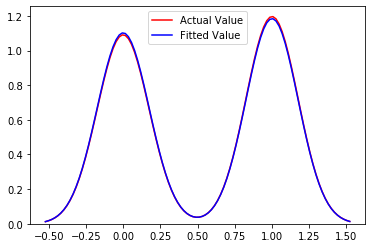

In [24]:
distribution_plot(y_test, svm_y_pred)

As we van see, for both classes (0 and 1) our model underfits the data.

### Model 1.2: SVM with non-linear decision boundary (Gaussian Kernels)

Despite finding out that the linear kernel is a better parameter for the SVM classifier with this data, let's train the model using Support Vector Machines (SVM) with non-linear decision boundary. For example, we will use Gaussian Kernels.

In [25]:
# Test SVM with non-linear decision boundary

# Use of Gaussian Kernels (options: linear, rbf and sigmoid)
svm_clf_gaussian = SVC(kernel='rbf', gamma='auto')
svm_clf_gaussian.fit(X_train, y_train)
gaussian_y_pred = svm_clf_gaussian.predict(X_test)

print_metrics(svm_clf_gaussian, X_test, y_test, gaussian_y_pred)

Accuracy 0.769231

[[61 32]
 [13 89]]
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        93
           1       0.74      0.87      0.80       102

    accuracy                           0.77       195
   macro avg       0.78      0.76      0.76       195
weighted avg       0.78      0.77      0.77       195



In [26]:
scores['smv_2'] = get_metrics(svm_clf_gaussian, X_test, y_test, gaussian_y_pred)
scores['smv_2']

[0.7692307692307693,
 0.7355371900826446,
 0.8725490196078431,
 0.7982062780269059]

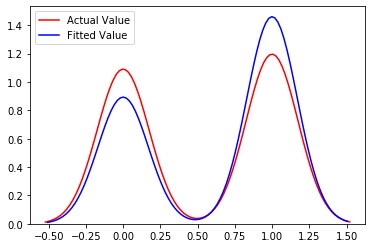

In [27]:
distribution_plot(y_test, gaussian_y_pred)

<a name='section_2_2_2'></a>

## 2.2.2. Model 2: KNN

As we are working with numerical features (not text data) in a classification problem, we can also use K-Nearest Neighbour classifier.

Resources: https://scikit-learn.org/stable/modules/neighbors.html

As in the previous examples, let's tune the classifier's parameters:

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Select hyperamaters
pipeline = Pipeline([
    ('knn', KNeighborsClassifier()),
])

parameters = {'knn__n_neighbors': [1, 40], 
              'knn__weights': ('uniform', 'distance'),
              'knn__algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')
             }

select_hyperparameters(pipeline, parameters)

Performing grid search...
parameters:
{'knn__n_neighbors': [1, 40], 'knn__weights': ('uniform', 'distance'), 'knn__algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


done in 1.137s

Best score: 0.773
Best parameters set:
	knn__algorithm: 'auto'
	knn__n_neighbors: 40
	knn__weights: 'uniform'


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.1s finished


Use the model with the best parameter set and fit it with the training data:

In [29]:
knn = KNeighborsClassifier(40, weights='uniform')
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print_metrics(knn, X_test, y_test, knn_y_pred)

Accuracy 0.769231

[[69 24]
 [21 81]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        93
           1       0.77      0.79      0.78       102

    accuracy                           0.77       195
   macro avg       0.77      0.77      0.77       195
weighted avg       0.77      0.77      0.77       195



In [30]:
scores['knn_n40'] = get_metrics(knn, X_test, y_test, knn_y_pred)
scores['knn_n40']

[0.7692307692307693, 0.7714285714285715, 0.7941176470588235, 0.782608695652174]

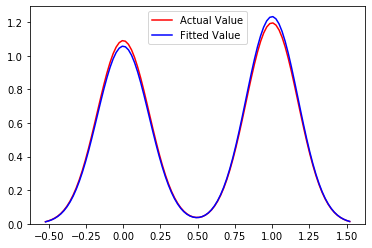

In [31]:
distribution_plot(y_test, knn_y_pred)

We've found that a good number of neighbours for this data using a KNN classifier is n=40.
We can also try with a smaller number of neighbours to see the results we obtain. Let's see with n=2 and n=5.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(2, weights='uniform')
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print_metrics(knn, X_test, y_test, knn_y_pred)

Accuracy 0.666667

[[80 13]
 [52 50]]
              precision    recall  f1-score   support

           0       0.61      0.86      0.71        93
           1       0.79      0.49      0.61       102

    accuracy                           0.67       195
   macro avg       0.70      0.68      0.66       195
weighted avg       0.70      0.67      0.66       195



In [33]:
scores['knn_n2'] = get_metrics(knn, X_test, y_test, knn_y_pred)
scores['knn_n2']

[0.6666666666666666,
 0.7936507936507936,
 0.49019607843137253,
 0.6060606060606061]

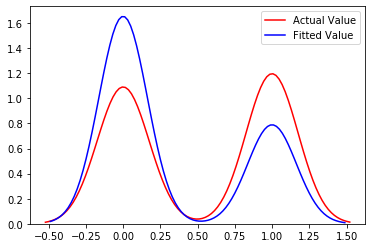

In [34]:
distribution_plot(y_test, knn_y_pred)

In [35]:
# Test KNN with 5 neighbours

knn = KNeighborsClassifier(5, weights='uniform')
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print_metrics(knn, X_test, y_test, knn_y_pred)
scores['knn_n5'] = get_metrics(knn, X_test, y_test, knn_y_pred)

Accuracy 0.733333

[[70 23]
 [29 73]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        93
           1       0.76      0.72      0.74       102

    accuracy                           0.73       195
   macro avg       0.73      0.73      0.73       195
weighted avg       0.73      0.73      0.73       195



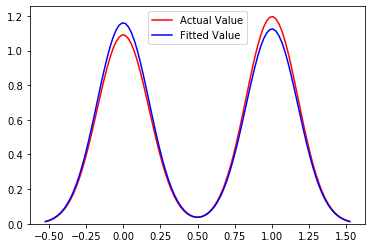

In [36]:
distribution_plot(y_test, knn_y_pred)

### How to choose N?

Another way to find a good value for the number of neighbours parameters is to calculate the mean error for a range of K values. Let's see how the KNN classifier performs for a range of N between 1 and 40.

Resource: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

Text(0, 0.5, 'Mean Error')

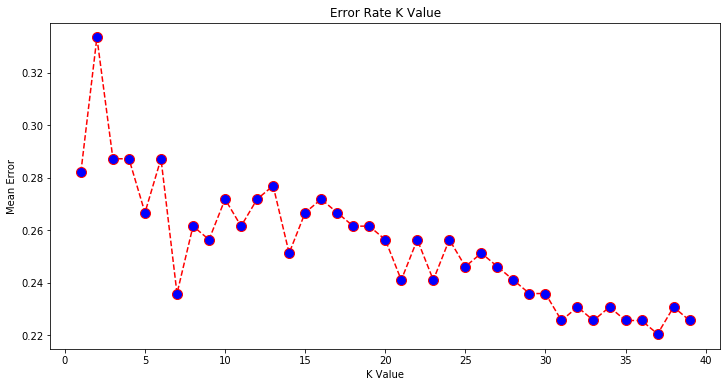

In [37]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**The best hyperparameters will be those that minimize the error, that is, the difference between the actual value and the predicted value. Therefore, we want a mean error close to 0.

We see that the mean error descends when the number of neighbours is bigger and is pretty good when N=37 (in this case, we don't have a validation test set)

Accuracy 0.779487

[[69 24]
 [19 83]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        93
           1       0.78      0.81      0.79       102

    accuracy                           0.78       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.78      0.78      0.78       195



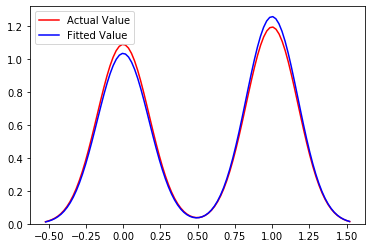

In [38]:
knn = KNeighborsClassifier(37, weights='uniform')
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print_metrics(knn, X_test, y_test, knn_y_pred)
scores['knn_n37'] = get_metrics(knn, X_test, y_test, knn_y_pred)

distribution_plot(y_test, knn_y_pred)

<a name='section_2_2_3'></a>

## 2.2.3. Model 3: Random Forest

To try to improve the KNN results for numerical features, we'll try Random Forest classifier.

Resources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

As we've seen before, first we'll tune the classifier's parameters:

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Select hyperamaters
pipeline = Pipeline([
    ('rfc', RandomForestClassifier()),
])

# n_estimators: The number of trees in the forest.
parameters = {'rfc__n_estimators': [10, 50, 100, 150],
              #'rfc__criterion': ["gini", "entropy"]
             }

select_hyperparameters(pipeline, parameters)

Performing grid search...
parameters:
{'rfc__n_estimators': [10, 50, 100, 150]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished


done in 2.763s

Best score: 0.811
Best parameters set:
	rfc__n_estimators: 100


In [40]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rfc_y_pred = rfc.predict(X_test)
scores['rfc'] = get_metrics(rfc, X_test, y_test, rfc_y_pred)
print_metrics(rfc, X_test, y_test, rfc_y_pred)

Accuracy 0.789744

[[75 18]
 [23 79]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        93
           1       0.81      0.77      0.79       102

    accuracy                           0.79       195
   macro avg       0.79      0.79      0.79       195
weighted avg       0.79      0.79      0.79       195



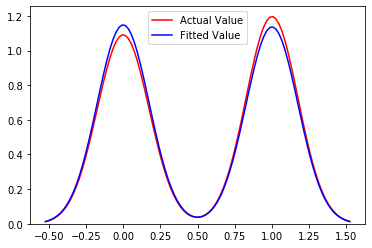

In [42]:
distribution_plot(y_test, rfc_y_pred)

<a name='chapter3'></a>

# 3. Model Comparison

### Table to compare the main metrics (accuracy, precision, recall and F1) for each of the three models  

In [43]:
classifiers = {'smv_1': 'SVM Linear Kernel', 
               'knn_n40': 'K-Nearest Neighbours (N=40)', 
               'rfc': 'Random Forest'}

clf_selected = {k: scores[k] for k in ('smv_1', 'knn_n40', 'rfc')}

clf_df = pd.DataFrame(clf_selected, index = ['Accuracy', 'Precission', 'Recall', 'F1-Score'])
clf_df.rename(columns=classifiers, inplace=True)
clf_df.rename_axis('Scores', axis='index', inplace=True)
clf_df.rename_axis('Algorithms', axis='columns', inplace=True)
clf_df.T

Scores,Accuracy,Precission,Recall,F1-Score
Algorithms,,,,
SVM Linear Kernel,0.800000,0.811881,0.803922,0.807882
K-Nearest Neighbours (N=40),0.769231,0.771429,0.794118,0.782609
Random Forest,0.789744,0.814433,0.774510,0.793970


### ROC curves and AUC

**ROC curves** are typically used in binary classification to study the output of a classifier and evaluate it's quality.

Receiver Operating Characteristic (ROC) curves is a metric that depicts relative trade-offs that a classifier majes between benefits (true positives) and costs (false positives).

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

**For a perfect classifier the ROC curve will go straight up the Y axis and then along the X axis. A classifier with no power will sit on the diagonal, whilst most classifiers fall somewhere in between.**

The "steepness" of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

The ROC curve is a useful tool for a few reasons:
- The curves of different models can be compared.
- The area under the curve (AUC) can be used as a summary of the model skill.

More info: https://machinelearningmastery.com/assessing-comparing-classifier-performance-roc-curves-2/ and  https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# ROC curve and AUC
def plot_roc_curve(y_test, probs):
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores and roc curve
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)

    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, color='darkorange', marker='.', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    pyplot.legend(loc="lower right")
    pyplot.show()

### SVM (Linear Kernel) ROC Curve

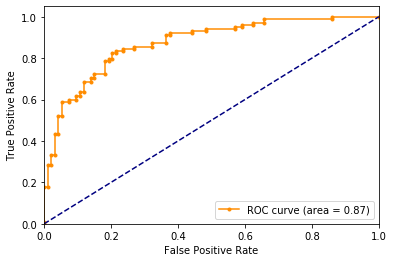

In [45]:
svm_clf = SVC(kernel='linear', C=10, probability=True)
svm_clf.fit(X_train, y_train)
# predict probabilities
probs = svm_clf.predict_proba(X_test)

plot_roc_curve(y_test, probs)

### KNN (n=40) ROC curve

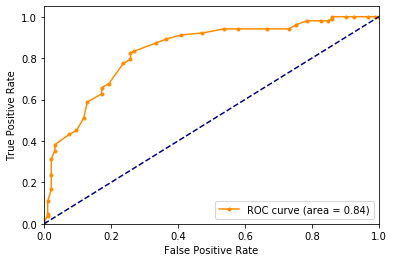

In [46]:
knn = KNeighborsClassifier(40, weights='uniform')
knn.fit(X_train, y_train)
plot_roc_curve(y_test, knn.predict_proba(X_test))

### Random Forest ROC curve

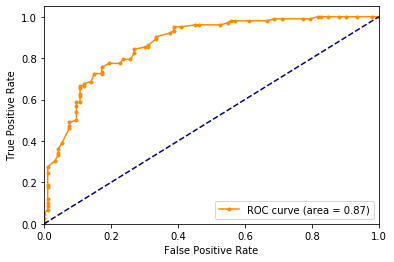

In [47]:
plot_roc_curve(y_test, rfc.predict_proba(X_test))

<a name='chapter4'></a>

# 4. Conclusions

In this classification problem, we have train and tested three different classifiers with the provided dataset.
As we don't have information about the original dataset and the meaning of the features, we can't assess the relative importance of each metric for the task. 
For example: do we prefer not to label as positive a sample that is negative or do we prefer to find all the positive samples? That is, do we prefer a higher precision or a higher recall? Or is the accuracy enough as a metric?

In the previous chapter we've seen a comparison table of these metrics for each of the selected classifiers. The numbers tell us that the SVM (Linear SVC) outperforms the other classifiers. 

As the ROC curves and AUC value are the same for SVM and Random Forest (0.87), we will choose SVM as a classifier for the given data.